# Travaller avec histograms

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt


from IPython.display import Markdown
plt.style.use('bmh')
plt.rcParams.update({'axes.labelsize': 20})
plt.rcParams.update({'legend.fontsize': 20})



We are going to generate a random sample of data using ```numpy.random.gauss```

In [4]:
data1 = np.random.normal(loc=5,scale=1, size=1000) # 1st gaussian
data2 = np.random.normal(loc=10,scale=2, size=3000) # 2nd gaussian
data = np.concatenate((data1,data2))

ntotal = data.size
print (data[:10])

[5.69636076 4.06143489 5.670704   4.72374012 6.4382987  3.50859261
 5.18732217 2.09494113 5.52555137 5.4228167 ]


Now we are going to make the representation of the data in a histogram

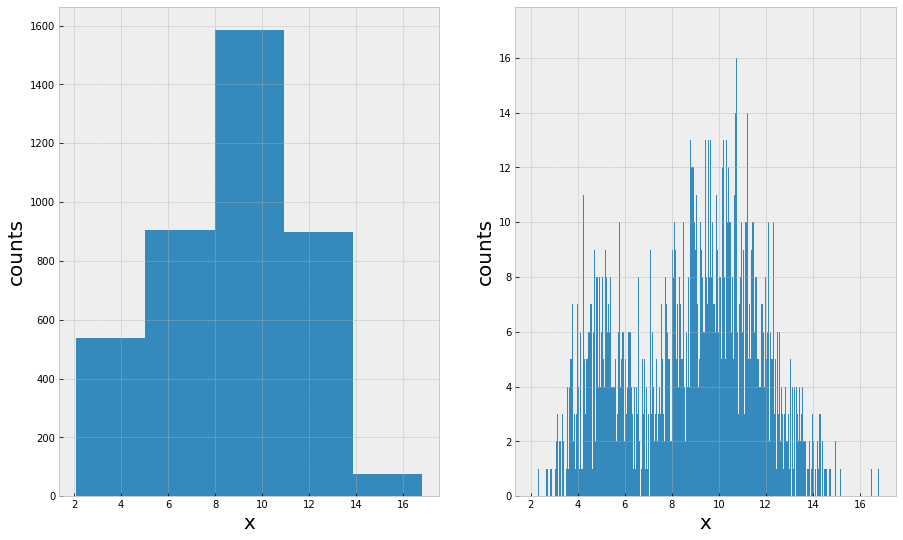

In [5]:
fig, axes = plt.subplots(1,2, figsize=(15, 9))
axes[0].hist(data, bins = 5)
axes[0].set_xlabel("x")
axes[0].set_ylabel("counts")

axes[1].hist(data, bins = 1000)
axes[1].set_xlabel("x")
axes[1].set_ylabel("counts")

plt.show()

Which one of the 2 binning is correct?

### Error of a bin

Each bin of a histogram has associated an error. This error can be derived from the binomial distribution. Indeed, we can see the process of an event falling into a bin (or not) as a binomial event. The probability of having $k$ success, or k events falling in a bin should therefore follow the binomial distribution:

$$P(k; n, p) = {n \choose k} p^k(1-p)^{n-k}$$

where $n$ are the total number of events in the sample and $p$ is the probability to fall into a given bin. This probability is unknown, but I could estimate from the histogram itself. For a given bin $i$, if I have $n_i$ events inside a bin $i$ then I can approximate the probability of falling into that bin as the ratio of events inside this bin, and the total number of events:

$$p\simeq \frac{n_i}{n}$$

In this case the mean of the binomial distribution for that particular bin $i$ can be written as:

$$\mu_i = n\cdot p \equiv n_i$$ 
In other words, the mean of the binomial distribution of each bin, is the bin content $n_i$. I can do the same for the variance:

$$\sigma_i = \sqrt{np(1-p)} = \sqrt{n\frac{n_i}{n}(1 -\frac{ni}{n})} = \sqrt{n_i} $$

Et voilá, I arrived at the conclusion that distribution of events inside a bin, should follow a binomial distribution with mean equal to the number of events inside a bin, and a dispersion of squared root of that number!

With this knowledge is now clear that from the plots above the one with 5 bins the fine structure of the data distribution is lost (too small relative errors), while with 1000 bins, heights of individual bins change more than the size of the bin errors (sampling error).



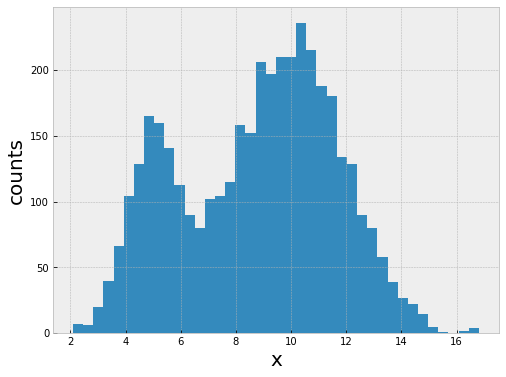

In [10]:

fig, ax = plt.subplots(1,1,figsize=(8,6))
bin_edges, hist, patches = ax.hist(data, bins = 40)
ax.set_xlabel("x")
ax.set_ylabel("counts")
plt.show()



I can in principle also use different binning for different regions of a histrogram.

In [66]:
np.concatenate((np.linspace(0, 5, 50,
                                               endpoint=False),
                                     np.linspace(5,18, 10)))

array([ 0.        ,  0.1       ,  0.2       ,  0.3       ,  0.4       ,
        0.5       ,  0.6       ,  0.7       ,  0.8       ,  0.9       ,
        1.        ,  1.1       ,  1.2       ,  1.3       ,  1.4       ,
        1.5       ,  1.6       ,  1.7       ,  1.8       ,  1.9       ,
        2.        ,  2.1       ,  2.2       ,  2.3       ,  2.4       ,
        2.5       ,  2.6       ,  2.7       ,  2.8       ,  2.9       ,
        3.        ,  3.1       ,  3.2       ,  3.3       ,  3.4       ,
        3.5       ,  3.6       ,  3.7       ,  3.8       ,  3.9       ,
        4.        ,  4.1       ,  4.2       ,  4.3       ,  4.4       ,
        4.5       ,  4.6       ,  4.7       ,  4.8       ,  4.9       ,
        5.        ,  6.44444444,  7.88888889,  9.33333333, 10.77777778,
       12.22222222, 13.66666667, 15.11111111, 16.55555556, 18.        ])

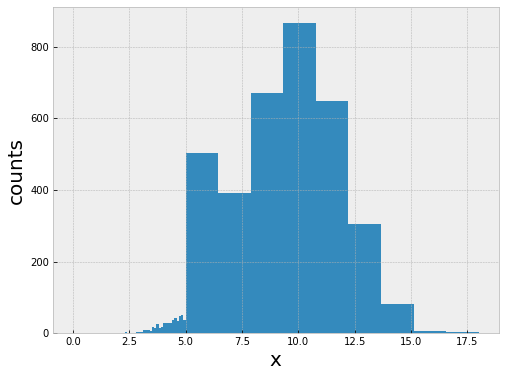

In [67]:
fig, ax = plt.subplots(figsize=(8,6))
bin_edges, hist, patches = ax.hist(data, bins = np.concatenate((np.linspace(0, 5, 50,
                                               endpoint=False),
                                     np.linspace(5,18, 10))), 
        density=False)
ax.set_xlabel("x")
ax.set_ylabel("counts")
plt.show()

The method matplotlib.hist returns as well the bin_edges, the heights of the bins and an array of objects called patches, which represent the color, geometry, etc. of the bin representation.


### Normalization of histograms

As default histograms are representation of occourence ie, in their y-axis they show $n_i$ which is just the number of events inside that bin. However, histograms can also be used to represent a density distribution. In this case histograms need to be normalized. Normalizing a histogram means divinding each bin by the total number and the binwidth, ie:

$$ n_i \rightarrow \frac{n_i}{\Delta x N} $$

since

$$\lim_{N\rightarrow \infty, \Delta x \rightarrow 0} \frac{n_i}{N \Delta x} \equiv f(x)$$

and therefore the normalization  goes as:

$$\int_{-\infty}^{\infty} f(x) {\rm d} x = 1 \rightarrow \sum_i^{n_{bins}} \frac{n_i}{N \Delta x} \Delta x = 1$$

The ```ax.hist``` method can already do the normalized histogram. It is called ```density``` and it divides each bin by the total number and the bin_width:

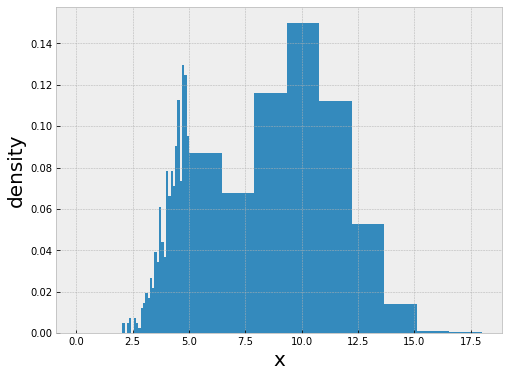

In [56]:
fig, ax = plt.subplots(figsize=(8,6))
bin_edges, hist, patches = ax.hist(data, bins = np.concatenate((np.linspace(0, 5, 50,
                                               endpoint=True),
                                     np.linspace(5,18, 10))), 
        density=True)
ax.set_xlabel("x")
ax.set_ylabel("density")
plt.show()

### Working without plotting

So far we used ``matplotlib.hist`` to create the historgrams. Sometimes you only need to access the information of the histograms without plotting them. In that case we can use ``numpy.histogram`` method which returns the same information as ``matplotlib.hist`` but without the patches:


In [70]:
hist, bin_edges = np.histogram(data, bins= 40, density=False)

print (hist)
print (bin_edges)

[  7   6  20  40  66 104 129 165 160 141 113  90  80 102 104 115 158 152
 206 197 210 210 236 215 188 180 134 129  90  80  58  39  27  22  15   5
   1   0   2   4]
[ 2.09494113  2.46262408  2.83030703  3.19798998  3.56567293  3.93335588
  4.30103884  4.66872179  5.03640474  5.40408769  5.77177064  6.13945359
  6.50713655  6.8748195   7.24250245  7.6101854   7.97786835  8.34555131
  8.71323426  9.08091721  9.44860016  9.81628311 10.18396606 10.55164902
 10.91933197 11.28701492 11.65469787 12.02238082 12.39006377 12.75774673
 13.12542968 13.49311263 13.86079558 14.22847853 14.59616148 14.96384444
 15.33152739 15.69921034 16.06689329 16.43457624 16.80225919]


In [58]:
print (hist.size)
print (bin_edges.size)

40
41


Note that the bin_edges have an element more than the bin heights since it gives the overflow bin_edge. Also note that numpy returns the bin_edges and not the bin centers nor the bin widths. I can calulate those easily:


In [59]:
binwidths = np.diff(bin_edges)

print (binwidths)
print (binwidths.size)

[0.36768295 0.36768295 0.36768295 0.36768295 0.36768295 0.36768295
 0.36768295 0.36768295 0.36768295 0.36768295 0.36768295 0.36768295
 0.36768295 0.36768295 0.36768295 0.36768295 0.36768295 0.36768295
 0.36768295 0.36768295 0.36768295 0.36768295 0.36768295 0.36768295
 0.36768295 0.36768295 0.36768295 0.36768295 0.36768295 0.36768295
 0.36768295 0.36768295 0.36768295 0.36768295 0.36768295 0.36768295
 0.36768295 0.36768295 0.36768295 0.36768295]
40


In [60]:
bin_centers = bin_edges[:-1] + np.diff(bin_edges)/2.
print (bin_centers)
print (bin_centers.size)

[ 2.2787826   2.64646555  3.01414851  3.38183146  3.74951441  4.11719736
  4.48488031  4.85256326  5.22024622  5.58792917  5.95561212  6.32329507
  6.69097802  7.05866097  7.42634393  7.79402688  8.16170983  8.52939278
  8.89707573  9.26475868  9.63244164 10.00012459 10.36780754 10.73549049
 11.10317344 11.47085639 11.83853935 12.2062223  12.57390525 12.9415882
 13.30927115 13.6769541  14.04463706 14.41232001 14.78000296 15.14768591
 15.51536886 15.88305182 16.25073477 16.61841772]
40


In [71]:
hist, bin_edges = np.histogram(data, bins= 40, density = True)

print (np.sum(hist))


2.71973447602194


Note that the sum is not 1. You need to multiply by the bin width to make:

$$\sum_i^{k} \frac{n_i}{n \Delta x} \Delta x = 1 $$

In [62]:
bin_width = np.diff(bin_edges)[0]

print (np.sum(hist)*bin_width)

1.0000000000000007


Now I have all these series of heights and edges, how can I plot this without going back to ```plt.hist```?

Text(0, 0.5, 'density')

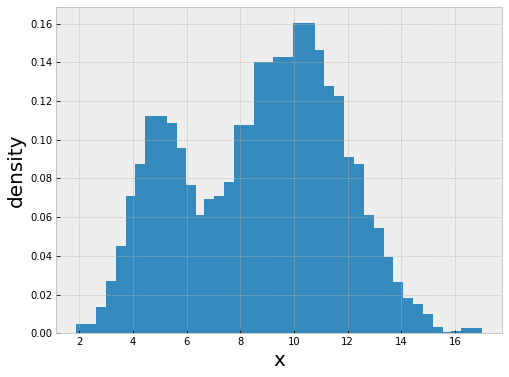

In [63]:
#hist, bin_edges = np.histogram(data, bins= 40, density = False)


bin_centers = bin_edges[:-1] + bin_width/2.


fig, ax = plt.subplots(figsize=(8,6))
ax.bar(bin_centers, hist)
ax.set_xlabel("x")
ax.set_ylabel("density")

Text(0, 0.5, 'density')

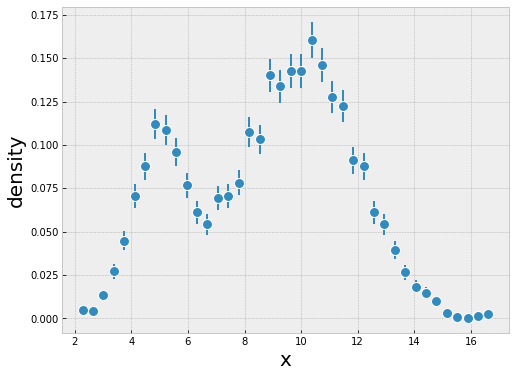

In [64]:
bin_centers = bin_edges[:-1] + bin_width/2.


fig, ax = plt.subplots(figsize=(8,6))
ax.errorbar(bin_centers, hist, np.sqrt(hist/len(data)/bin_width), fmt='o', ms=10, markeredgecolor='white')
ax.set_xlabel("x")
ax.set_ylabel("density")

In [1]:
from scipy import stats

In [3]:
p = stats.poisson(2)

In [15]:
p.sf(4)

0.052653017343711125